# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Scraping
from splinter import Browser
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# requests
import requests
import time

# parsing
from bs4 import BeautifulSoup

# data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
rows = soup.find_all("tr", {"class": "data-row"})
rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

In [6]:
rows [0].text.strip().split("\n")

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
data = []


# Loop through the scraped data to create a list of rows
for i in rows:
    line = i.text.strip().split("\n")
    data.append(line)

In [8]:
data

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ["id","terrestrial_date", "sol",	"ls", "month",	"min_temp",	"pressure"]
df = pd.DataFrame(data, columns = column_names)


In [25]:
# Confirm DataFrame was created successfully
df.head(20)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# Change data types for data analysis
df["sol"] = df["sol"].astype(int)
df["ls"] = df["ls"].astype(int)
df["month"] = df["month"].astype(int)
df["min_temp"] = df["min_temp"].astype(float)
df["pressure"] = df["pressure"].astype(float)
df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])


In [13]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
df["month"].nunique()

12

In [15]:
# 2. How many sols (Martian days) worth of data are there?
df["sol"].nunique()

1867

In [16]:
# 3. What is the average minimum temperature by month?
df.groupby('month')['min_temp'].mean()

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

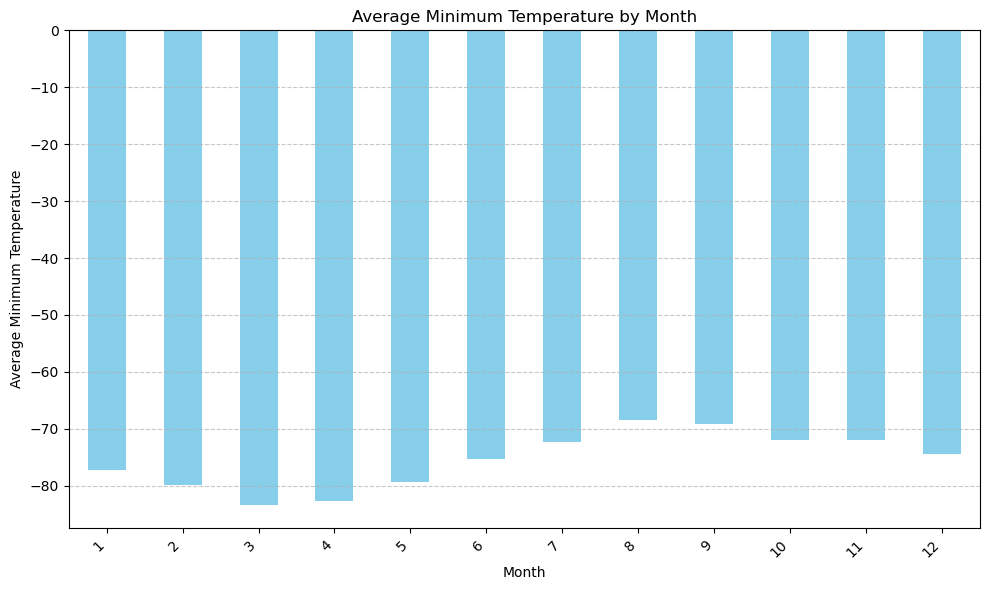

In [17]:
# Plot the average minimum temperature by month
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
avg_min_temp_by_month.plot(kind='bar', color='skyblue') # or line plot: .plot(kind='line', marker='o')
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [18]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_min_temp_by_month.sort_values()

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

In [19]:
# 4. What is the average pressure by month?
df.groupby('month')['pressure'].mean()

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

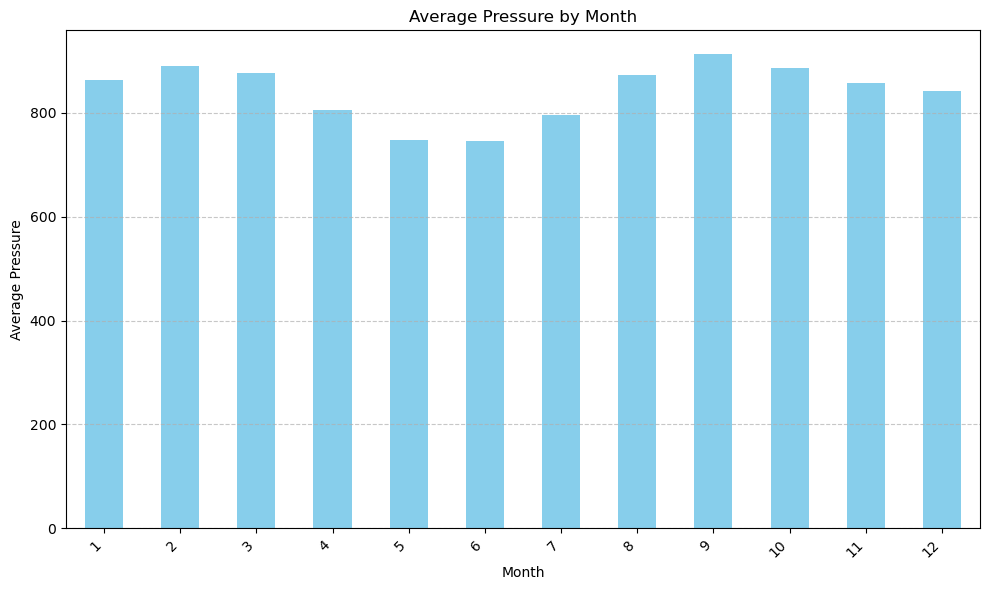

In [20]:
# Plot the average pressure by month
avg_pressure_by_month = df.groupby('month')['pressure'].mean()
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
avg_pressure_by_month.plot(kind='bar', color='skyblue') # or line plot: .plot(kind='line', marker='o')
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [21]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure_by_month.sort_values()

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64

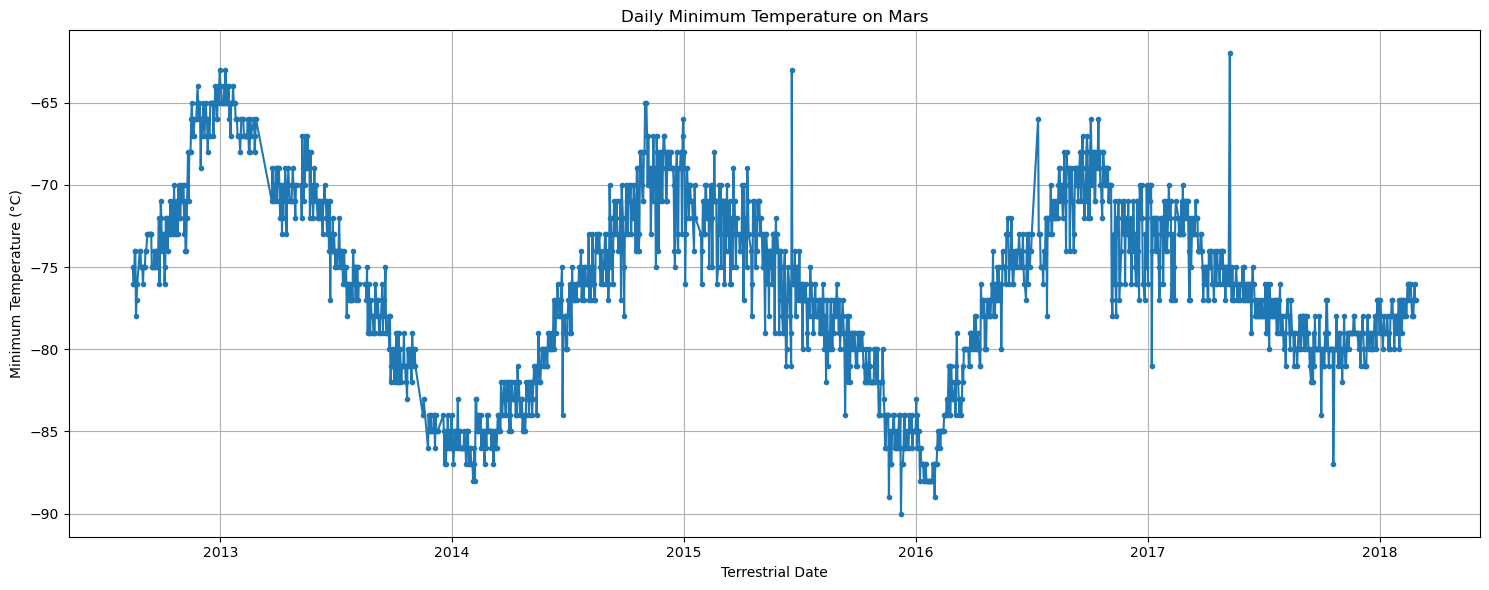

In [22]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(15, 6))  # Adjust figure size for a wider view
plt.plot(df['terrestrial_date'], df['min_temp'], marker='o', linestyle='-', markersize=3)
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Minimum Temperature

The min_temp column represents the minimum temperature recorded on a given Martian day (sol).  Looking at the data, we see the temperatures fluctuate, generally ranging from around -78°C to -73°C.  A more in-depth analysis would require a larger dataset to observe any trends or seasonality.  With the current data, we can only describe the observed range and note that the minimum temperatures are all significantly below freezing (0°C).

#### Atmospheric Pressure

The pressure column indicates the atmospheric pressure. The values are all in the 739-748 range.  Just as with temperature, we can describe the range, but a meaningful analysis requires more data.  

#### Year Length

The provided data spans from August 16, 2012, to September 8, 2012. This is only a small portion of a Martian year.  A Martian year (also called a "sidereal year") is significantly longer than an Earth year, approximately 687 Earth days.  To analyze the Martian year length, we would need data covering at least one full Martian year (or preferably multiple Martian years).

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [23]:
# Write the data to a CSV
df.to_csv("Mars_Weather.csv", index = False)

In [24]:
browser.quit()